In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences # 패딩

In [2]:
data = pd.read_csv('spam.csv', encoding='latin1')
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
print('총 샘플의 수 :',len(data))

총 샘플의 수 : 5572


In [4]:
# 2~4열 삭제
del data['Unnamed: 2']
del data['Unnamed: 3']
del data['Unnamed: 4']

In [5]:
data

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
# 0과 1로 변형
data['v1'] = data['v1'].replace(['ham','spam'],[0,1])

In [7]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [8]:
print('v2열의 유니크한 값 :',data['v2'].nunique())

v2열의 유니크한 값 : 5169


In [9]:
data.drop_duplicates(subset=['v2'], inplace=True)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5169 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5169 non-null   int64 
 1   v2      5169 non-null   object
dtypes: int64(1), object(1)
memory usage: 121.1+ KB


In [11]:
data.groupby('v1')

In [12]:
data.groupby('v1').count()

,v2
v1,
0,4516
1,653


In [13]:
data

,v1,v2
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [14]:
X_data = data['v2']
y_data = data['v1']

In [15]:
# stratify : 동일한 비율로 나누는 것 ( 층화추출)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2, random_state=0, stratify=y_data)

In [16]:
X_train

1882                     Sorry, I can't help you on this.
4948                    I am in bus on the way to calicut
4460    Thanks again for your reply today. When is ur ...
4851                               I liked your new house
201     Hello darlin ive finished college now so txt m...
                              ...                        
1971                          Enjoy ur life. . Good night
3701    Hey loverboy! I love you !! I had to tell ... ...
2809                 Mm so you asked me not to call radio
1229                      Jus ans me lar. U'll noe later.
2531    What's happening with you. Have you gotten a j...
Name: v2, Length: 4135, dtype: object

In [17]:
X_test

4183    I just really need shit before tomorrow and I ...
108     I know! Grumpy old people. My mom was like you...
5237    Someonone you know is trying to contact you vi...
1858                     Sir, i am waiting for your call.
3603            Hey morning what you come to ask:-) pa...
                              ...                        
2086                  Dude how do you like the buff wind.
5548                   No, I was trying it all weekend ;V
2254                              Ok. Me watching tv too.
3593    Do you want a New Nokia 3510i Colour Phone Del...
1174    Yay! You better not have told that to 5 other ...
Name: v2, Length: 1034, dtype: object

In [18]:
y_train

1882    0
4948    0
4460    0
4851    0
201     0
       ..
1971    0
3701    0
2809    0
1229    0
2531    0
Name: v1, Length: 4135, dtype: int64

In [19]:
y_test

4183    0
108     0
5237    1
1858    0
3603    0
       ..
2086    0
5548    0
2254    0
3593    1
1174    0
Name: v1, Length: 1034, dtype: int64

In [20]:
# 토크나이저 만들기, 객체일 뿐
tokenizer = Tokenizer()

In [21]:
tokenizer
# 코퍼스에 있는 텍스트 데이터로부터 토크나이저를 생성

In [22]:
tokenizer.fit_on_texts(X_train)

In [23]:
len(tokenizer.index_word)

7821

In [24]:
tokenizer.index_word 

{1: 'i',
 2: 'to',
 3: 'you',
 4: 'a',
 5: 'the',
 6: 'u',
 7: 'and',
 8: 'in',
 9: 'is',
 10: 'me',
 11: 'my',
 12: 'for',
 13: 'your',
 14: 'it',
 15: 'of',
 16: 'have',
 17: 'on',
 18: 'call',
 19: 'that',
 20: 'are',
 21: '2',
 22: 'now',
 23: 'so',
 24: 'but',
 25: 'not',
 26: 'can',
 27: 'or',
 28: "i'm",
 29: 'get',
 30: 'at',
 31: 'do',
 32: 'if',
 33: 'be',
 34: 'will',
 35: 'just',
 36: 'with',
 37: 'we',
 38: 'no',
 39: 'this',
 40: 'ur',
 41: 'up',
 42: '4',
 43: 'how',
 44: 'gt',
 45: 'lt',
 46: 'go',
 47: 'when',
 48: 'from',
 49: 'what',
 50: 'ok',
 51: 'out',
 52: 'know',
 53: 'free',
 54: 'all',
 55: 'like',
 56: 'then',
 57: 'got',
 58: 'good',
 59: 'am',
 60: 'time',
 61: 'was',
 62: 'come',
 63: 'its',
 64: 'love',
 65: 'want',
 66: 'text',
 67: 'he',
 68: 'only',
 69: 'there',
 70: 'day',
 71: 'need',
 72: 'going',
 73: 'lor',
 74: 'send',
 75: 'one',
 76: 'as',
 77: 'home',
 78: 'about',
 79: 'back',
 80: 'still',
 81: 'k',
 82: 'see',
 83: 'txt',
 84: 'by',
 85: 

In [25]:
# 단어마다 몇개가 있는지 확인
tokenizer.word_counts

OrderedDict([('sorry', 101),
             ('i', 1832),
             ("can't", 47),
             ('help', 44),
             ('you', 1644),
             ('on', 404),
             ('this', 258),
             ('am', 171),
             ('in', 664),
             ('bus', 22),
             ('the', 1003),
             ('way', 75),
             ('to', 1679),
             ('calicut', 2),
             ('thanks', 65),
             ('again', 55),
             ('for', 525),
             ('your', 519),
             ('reply', 105),
             ('today', 108),
             ('when', 221),
             ('is', 643),
             ('ur', 256),
             ('visa', 1),
             ('coming', 41),
             ('and', 754),
             ('r', 113),
             ('u', 859),
             ('still', 125),
             ('buying', 5),
             ('gucci', 1),
             ('bags', 2),
             ('my', 551),
             ('sister', 13),
             ('things', 31),
             ('are', 383),
             ('no

In [26]:
#인덱스로 변환됨
X_train_encoded=tokenizer.texts_to_sequences(X_train)
print(X_train_encoded)

[[102, 1, 210, 230, 3, 17, 39], [1, 59, 8, 427, 17, 5, 137, 2, 2326], [157, 180, 12, 13, 98, 93, 47, 9, 40, 3485, 247, 8, 7, 87, 6, 80, 1312, 5, 3486, 7, 2327, 11, 660, 306, 20, 25, 467, 708, 1028, 203, 129, 193, 800, 2328, 23, 1, 144, 71, 2, 111, 78, 43, 2, 130, 11, 800, 186, 122, 1512], [1, 1154, 13, 104, 292], [222, 622, 857, 540, 623, 22, 23, 83, 10, 47, 6, 257, 32, 6, 26, 64, 936, 407], [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3], [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112], [171, 16, 3, 522, 1155, 12, 104, 449], [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180], [709, 223, 115, 1, 390, 2, 89, 3, 25, 2, 89, 10, 13, 1812, 166, 14, 316, 130, 10, 1313, 24, 63, 3489, 10, 23, 157, 12, 3490], [140, 1, 1156, 4, 710, 15, 566, 17, 1314, 349, 80, 711, 624, 119, 28, 35, 1315, 41], [58, 280, 34, 31], [145, 3, 128, 1, 111, 3, 26, 252, 13, 44, 3491, 22, 2, 2330, 25, 173, 24, 32, 349, 469, 1, 26, 230, 172, 10, 52, 24, 47, 3, 31, 33, 173, 3, 20, 281], [3

In [27]:
word_to_index = tokenizer.word_index
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [28]:
len(word_to_index)

7821

In [29]:
tokenizer.word_counts.items() # 키, 밸류

odict_items([('sorry', 101), ('i', 1832), ("can't", 47), ('help', 44), ('you', 1644), ('on', 404), ('this', 258), ('am', 171), ('in', 664), ('bus', 22), ('the', 1003), ('way', 75), ('to', 1679), ('calicut', 2), ('thanks', 65), ('again', 55), ('for', 525), ('your', 519), ('reply', 105), ('today', 108), ('when', 221), ('is', 643), ('ur', 256), ('visa', 1), ('coming', 41), ('and', 754), ('r', 113), ('u', 859), ('still', 125), ('buying', 5), ('gucci', 1), ('bags', 2), ('my', 551), ('sister', 13), ('things', 31), ('are', 383), ('not', 336), ('easy', 20), ('uncle', 12), ('john', 7), ('also', 48), ('has', 79), ('his', 50), ('own', 10), ('bills', 2), ('so', 353), ('really', 71), ('need', 142), ('think', 93), ('about', 126), ('how', 235), ('make', 79), ('money', 52), ('later', 84), ('sha', 4), ('liked', 6), ('new', 100), ('house', 33), ('hello', 45), ('darlin', 14), ('ive', 9), ('finished', 17), ('college', 14), ('now', 360), ('txt', 119), ('me', 614), ('finish', 39), ('if', 297), ('can', 326),

In [30]:
total_cnt = len(word_to_index)

In [31]:
# 등장빈도수, 이것보다 작은게 몇개인지 확인하는것
threshold = 2

In [32]:
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

In [33]:
for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

In [34]:
total_freq

65145

In [35]:
rare_cnt

4337

In [36]:
rare_freq

4337

In [37]:
# 전체 단어중에서 등장 빈도수가 1인 단어의 비율
rare_cnt/total_cnt

0.5545326684567191

In [38]:
# 전체 등장 빈도에서 등장 빈도수가 1인 단어 등장 비율
(rare_freq/total_freq)*100

6.65745644331875

위 처럼 등장 빈수가 낮은 것들은 자연어 처리에서 제거 할 수 있음

In [39]:
tokenizer_over2 = Tokenizer(num_words=total_cnt-rare_cnt+1)
tokenizer_over2.fit_on_texts(X_train)

In [40]:
len(tokenizer_over2.index_word)

7821

In [41]:
total_cnt

7821

In [42]:
rare_cnt

4337

In [43]:
total_cnt-rare_cnt

3484

In [44]:
sentences = [
    'I love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer3 = Tokenizer(num_words=4)

In [45]:
tokenizer3.fit_on_texts(sentences)
word_index = tokenizer3.word_index
word_index

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}

In [46]:
seq = tokenizer3.texts_to_sequences(sentences)
print(word_index)  # {'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
print(seq) # num_words가 4라 3까지만 나와서 dog이 안나옴

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
[[3, 1, 2], [3, 1, 2], [1, 2]]


In [47]:
sentences = [
    'I love my dog',
    'I, love my cat',
    'You love my dog!'
]

tokenizer3 = Tokenizer(num_words=5)

In [48]:
tokenizer3.fit_on_texts(sentences)
word_index = tokenizer3.word_index
word_index

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}

In [49]:
seq = tokenizer3.texts_to_sequences(sentences)
print(word_index)  # {'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
print(seq) 

{'love': 1, 'my': 2, 'i': 3, 'dog': 4, 'cat': 5, 'you': 6}
[[3, 1, 2, 4], [3, 1, 2], [1, 2, 4]]


In [50]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [51]:
X_train_encoded

[[102, 1, 210, 230, 3, 17, 39],
 [1, 59, 8, 427, 17, 5, 137, 2, 2326],
 [157,
  180,
  12,
  13,
  98,
  93,
  47,
  9,
  40,
  3485,
  247,
  8,
  7,
  87,
  6,
  80,
  1312,
  5,
  3486,
  7,
  2327,
  11,
  660,
  306,
  20,
  25,
  467,
  708,
  1028,
  203,
  129,
  193,
  800,
  2328,
  23,
  1,
  144,
  71,
  2,
  111,
  78,
  43,
  2,
  130,
  11,
  800,
  186,
  122,
  1512],
 [1, 1154, 13, 104, 292],
 [222,
  622,
  857,
  540,
  623,
  22,
  23,
  83,
  10,
  47,
  6,
  257,
  32,
  6,
  26,
  64,
  936,
  407],
 [96, 18, 3487, 937, 76, 69, 9, 146, 183, 168, 251, 12, 3],
 [1, 52, 661, 248, 801, 7, 2329, 52, 1, 57, 14, 408, 468, 3, 58, 112],
 [171, 16, 3, 522, 1155, 12, 104, 449],
 [1, 450, 29, 40, 541, 134, 3488, 9, 523, 74, 14, 180],
 [709,
  223,
  115,
  1,
  390,
  2,
  89,
  3,
  25,
  2,
  89,
  10,
  13,
  1812,
  166,
  14,
  316,
  130,
  10,
  1313,
  24,
  63,
  3489,
  10,
  23,
  157,
  12,
  3490],
 [140,
  1,
  1156,
  4,
  710,
  15,
  566,
  17,
  1314,
  34

In [52]:
print('메일의 최대 길이 : %d' % max(len(sample) for sample in X_train_encoded))

메일의 최대 길이 : 189


In [53]:
print('메일의 평균 길이 : %f' % (sum(map(len, X_train_encoded))/len(X_train_encoded)))

메일의 평균 길이 : 15.754534


In [54]:
sum(map(len, X_train_encoded))

65145

(array([1.390e+02, 1.361e+03, 9.540e+02, 6.010e+02, 4.370e+02, 2.840e+02,
        2.970e+02, 3.580e+02, 5.460e+02, 6.700e+01, 2.700e+01, 1.400e+01,
        1.800e+01, 1.200e+01, 5.000e+00, 1.300e+01, 8.000e+00, 4.000e+00,
        4.000e+00, 1.000e+00, 5.000e+00, 1.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  2.  ,  20.16,  38.32,  56.48,  74.64,  92.8 , 110.96, 129.12,
        147.28, 165.44, 183.6 , 201.76, 219.92, 238.08, 256.24, 274.4 ,
        292.56, 310.72, 328.88, 347.04, 365.2 , 383.36, 401.52, 419.68,
        437.84, 456.  , 474.16, 492.32, 510.48, 528.64, 546.8 , 564.96,
        583.12, 601.28, 619.44, 637.6 , 655.76, 673.92, 692.08, 710.24,
        728.4 , 

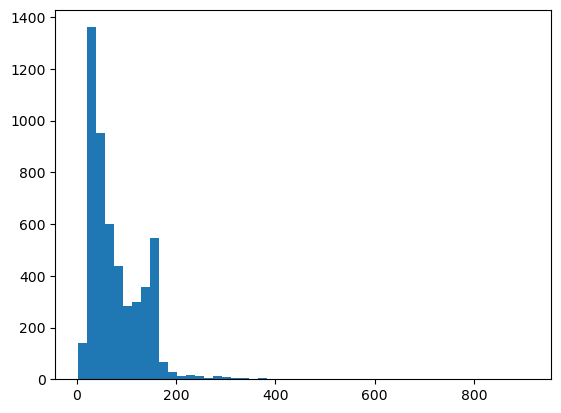

In [55]:
plt.hist([len(sample) for sample in X_data], bins=50)

In [56]:
X_train_padded=pad_sequences(X_train_encoded, maxlen =189)

In [57]:
X_train_padded

array([[   0,    0,    0, ...,    3,   17,   39],
       [   0,    0,    0, ...,  137,    2, 2326],
       [   0,    0,    0, ...,  186,  122, 1512],
       ...,
       [   0,    0,    0, ...,    2,   18, 1604],
       [   0,    0,    0, ..., 1297,  560,  122],
       [   0,    0,    0, ...,   12, 7820, 7821]])

In [58]:
X_train_padded.shape

(4135, 189)

In [59]:
from tensorflow.keras.layers import SimpleRNN, Embedding, Dense
from tensorflow.keras.models import Sequential

embedding_dim = 32
hidden_units = 32

In [60]:
len(word_to_index)

7821

In [61]:
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [62]:
vocab_size=len(word_to_index)+1 # 패딩 토큰 0번이 사용되므로 1을 더함

In [63]:
word_to_index

{'i': 1,
 'to': 2,
 'you': 3,
 'a': 4,
 'the': 5,
 'u': 6,
 'and': 7,
 'in': 8,
 'is': 9,
 'me': 10,
 'my': 11,
 'for': 12,
 'your': 13,
 'it': 14,
 'of': 15,
 'have': 16,
 'on': 17,
 'call': 18,
 'that': 19,
 'are': 20,
 '2': 21,
 'now': 22,
 'so': 23,
 'but': 24,
 'not': 25,
 'can': 26,
 'or': 27,
 "i'm": 28,
 'get': 29,
 'at': 30,
 'do': 31,
 'if': 32,
 'be': 33,
 'will': 34,
 'just': 35,
 'with': 36,
 'we': 37,
 'no': 38,
 'this': 39,
 'ur': 40,
 'up': 41,
 '4': 42,
 'how': 43,
 'gt': 44,
 'lt': 45,
 'go': 46,
 'when': 47,
 'from': 48,
 'what': 49,
 'ok': 50,
 'out': 51,
 'know': 52,
 'free': 53,
 'all': 54,
 'like': 55,
 'then': 56,
 'got': 57,
 'good': 58,
 'am': 59,
 'time': 60,
 'was': 61,
 'come': 62,
 'its': 63,
 'love': 64,
 'want': 65,
 'text': 66,
 'he': 67,
 'only': 68,
 'there': 69,
 'day': 70,
 'need': 71,
 'going': 72,
 'lor': 73,
 'send': 74,
 'one': 75,
 'as': 76,
 'home': 77,
 'about': 78,
 'back': 79,
 'still': 80,
 'k': 81,
 'see': 82,
 'txt': 83,
 'by': 84,
 'da'

In [64]:
vocab_size

7822

In [65]:
X_train_padded[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

# RNN 사용
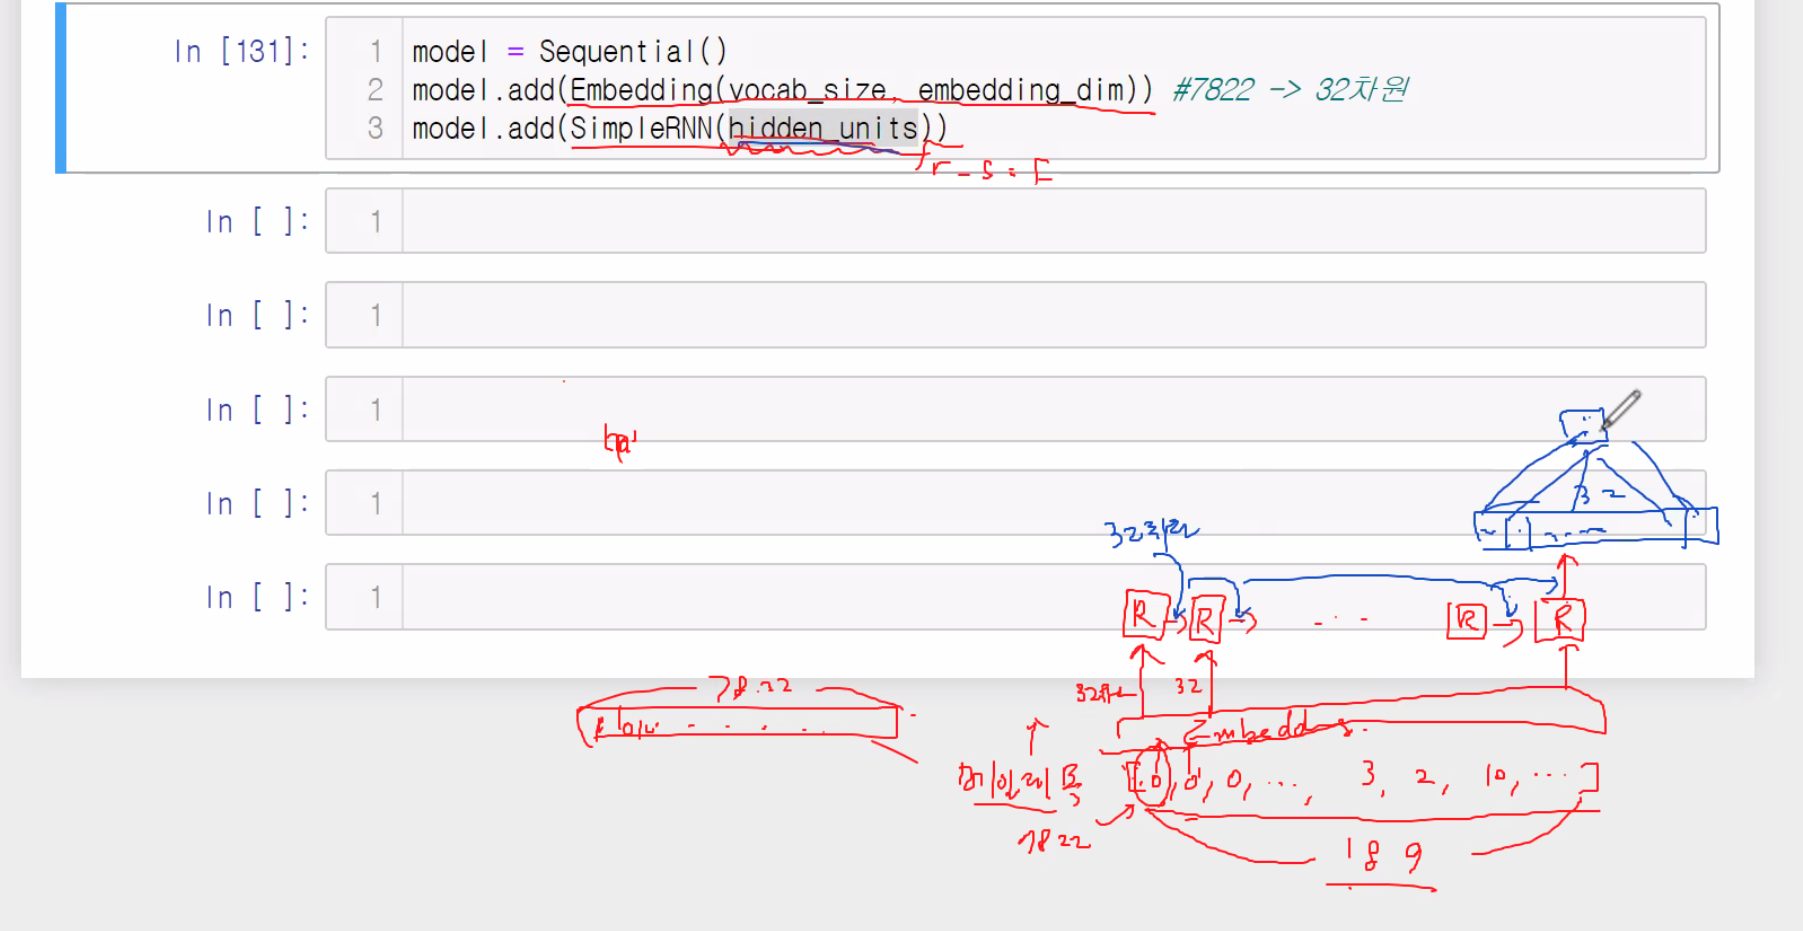
#### 스팸인지, 스팸이 아닌지 확인하는 것

In [66]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_dim)) # 7822 차원(단어 종류가 7822개)을 32차원으로 축소
model.add(SimpleRNN(hidden_units))
model.add(Dense(1,activation="sigmoid")) # 시그모이드 함수이므로 0과 1 사이가 출력

In [67]:
# 옵티마이저 = rmsprop, loss는 2진 엔트로피
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train_padded, y_train, epochs=4, batch_size=64, validation_split=0.2) # x트레인을 8대2

Epoch 1/4
52/52 [==============================] - 2s 24ms/step - loss: 0.4222 - acc: 0.8622 - val_loss: 0.3433 - val_acc: 0.8779
Epoch 2/4
52/52 [==============================] - 1s 20ms/step - loss: 0.2275 - acc: 0.9281 - val_loss: 0.1390 - val_acc: 0.9649
Epoch 3/4
52/52 [==============================] - 1s 20ms/step - loss: 0.0995 - acc: 0.9743 - val_loss: 0.1110 - val_acc: 0.9649
Epoch 4/4
52/52 [==============================] - 1s 20ms/step - loss: 0.0497 - acc: 0.9885 - val_loss: 0.0941 - val_acc: 0.9674


In [68]:
X_test

4183    I just really need shit before tomorrow and I ...
108     I know! Grumpy old people. My mom was like you...
5237    Someonone you know is trying to contact you vi...
1858                     Sir, i am waiting for your call.
3603            Hey morning what you come to ask:-) pa...
                              ...                        
2086                  Dude how do you like the buff wind.
5548                   No, I was trying it all weekend ;V
2254                              Ok. Me watching tv too.
3593    Do you want a New Nokia 3510i Colour Phone Del...
1174    Yay! You better not have told that to 5 other ...
Name: v2, Length: 1034, dtype: object

In [69]:
tokenizer.texts_to_sequences(X_test)

[[1, 35, 144, 71, 376, 194, 169, 7, 1, 52, 3, 619, 33, 1520, 194, 55, 314],
 [1,
  52,
  545,
  318,
  11,
  979,
  61,
  55,
  3,
  302,
  25,
  33,
  56,
  180,
  1,
  59,
  248,
  5,
  75,
  2,
  442],
 [3,
  52,
  9,
  305,
  2,
  219,
  3,
  1153,
  94,
  854,
  286,
  2,
  179,
  51,
  151,
  14,
  211,
  33,
  18,
  48,
  13,
  106,
  27,
  420],
 [364, 1, 59, 251, 12, 13, 18],
 [107, 195, 49, 3, 62, 2, 143, 408],
 [133, 8, 131, 29],
 [53,
  593,
  8,
  21,
  4,
  1021,
  893,
  2,
  224,
  1603,
  841,
  4720,
  324,
  5626,
  66,
  2,
  2,
  411,
  593,
  656,
  1197,
  83,
  461,
  209,
  727,
  396],
 [140, 24, 1, 90, 201, 1, 71, 3, 409, 445],
 [50, 269, 2, 31, 121, 276, 899, 8],
 [64, 14, 1, 65, 2, 19, 932, 1583, 36, 909],
 [410, 1, 16, 4, 104, 3252, 22],
 [223,
  50,
  1,
  4825,
  8,
  2,
  143,
  705,
  170,
  7,
  95,
  178,
  1207,
  114,
  8,
  20,
  3,
  187,
  614,
  39,
  397,
  828],
 [1, 65, 711, 150, 35, 3831, 7],
 [59, 558, 34, 235, 33, 189, 54, 5, 261],
 [145,

In [70]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_encoded = pad_sequences(X_test_encoded, maxlen =189)

In [71]:
X_test_encoded

array([[  0,   0,   0, ..., 194,  55, 314],
       [  0,   0,   0, ...,  75,   2, 442],
       [  0,   0,   0, ..., 106,  27, 420],
       ...,
       [  0,   0,   0, ..., 399, 483, 119],
       [  0,   0,   0, ...,  27,  18, 725],
       [  0,   0,   0, ..., 249, 661, 761]])

In [72]:
# 189개의 단어인데 패딩을 했기 때문에 앞에 대부분 0으로 채워진 상태
X_test_encoded.shape

(1034, 189)

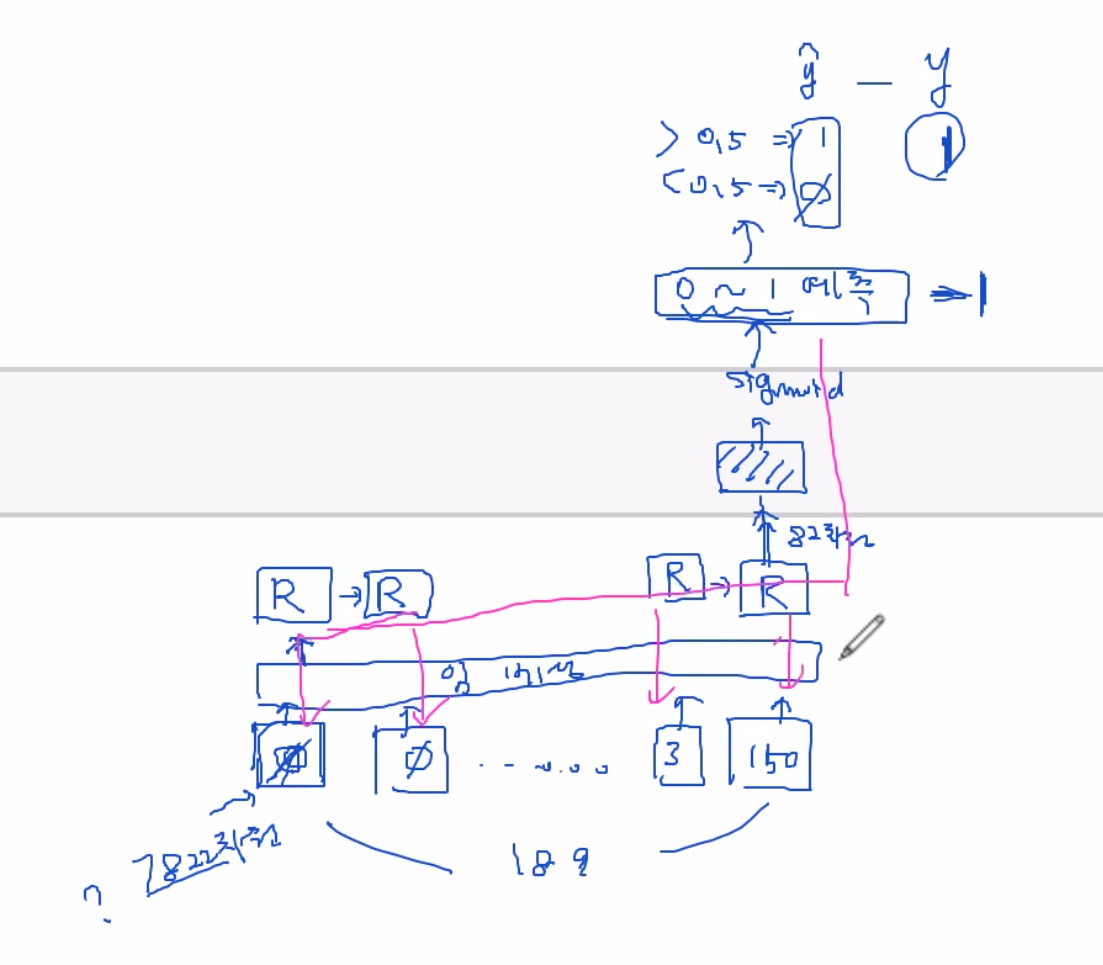

In [73]:
32*33

1056

In [74]:
model.predict(X_test_encoded)

33/33 [==============================] - 0s 5ms/step


array([[0.00737112],
       [0.00719618],
       [0.70518184],
       ...,
       [0.00541886],
       [0.99381614],
       [0.00782625]], dtype=float32)

# 여기는 다른 코드

In [75]:
X_test_encoded=tokenizer.texts_to_sequences(X_test)
X_test_padded = pad_sequences(X_test_encoded, maxlen =189)

In [76]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test_padded, y_test)[1]))

33/33 [==============================] - 0s 6ms/step - loss: 0.0965 - acc: 0.9749

 테스트 정확도: 0.9749


In [77]:
# 팀원별 메일 제목/ 분류결과 데이터셋 구성
# 스팸 메일 /  햄 메일 분류기
# 도착 메일 -> 누구의 메일일까 -> 자동 분류

In [78]:
X_test_padded.shape

(1034, 189)

In [79]:
# 고객님 이번에 세일을 합니다. 방문해 주세요
# 토큰화 -> 수치 변환 -> 패딩 -> 모델 입력 -> 결과

# 한글 감성 분류기

In [80]:
# 모델에 대한 정성적 평가
# XAI = eXplainable AI

# 스팸/ 햄 메일 분류기 자동화
# - 데이터 수집 -> 전처리 -> 분석 -> 시각화 -> 모델링 -> 성능개선
# - 기존 모델에 새롭게 수집된 데이터를 추가하여 학습 (파인튜닝)
# - 시그모이드 함수결과가 0.01이면 0으로 보고 0.0.5넘으면 1로 본다
# 그러나 0.49 -> 0, 0.4999 -> 0, 0.5000 -> 1, 0.51 -> 1로봄 ( 이런 데이터는 데이터 리터러시를 해야함)

In [81]:
# pip install konlpy

In [82]:
from konlpy.tag import Okt

In [83]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [84]:
# ratings_total : 리뷰에 관한 것들이 있음
urllib.request.urlretrieve("https://raw.githubusercontent.com/bab2min/corpus/master/sentiment/naver_shopping.txt", filename="ratings_total.txt")

('ratings_total.txt', <http.client.HTTPMessage at 0x208a5ec2c90>)

In [85]:
total_data = pd.read_table('ratings_total.txt', names=['ratings', 'reviews'])

In [86]:
total_data=total_data.head(10000)

In [87]:
np.select([total_data.ratings>3],[1])        # 앞은 컨디션 리스트, [1]은 초이스 리스트

array([1, 0, 1, ..., 0, 0, 0])

In [88]:
np.select([total_data.ratings>3],[1], default = 0)   

array([1, 0, 1, ..., 0, 0, 0])

In [89]:
np.select([total_data.ratings>3],[1], default = 9)   

array([1, 9, 1, ..., 9, 9, 9])

In [90]:
x=np.arange(10)
x

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [91]:
np.select([x<3],[x**2]) # 출력값 0은 디폴트

array([0, 1, 4, 0, 0, 0, 0, 0, 0, 0])

In [92]:
# 디폴트 설정
np.select([x<3],[x**2], default=999) # 출력값 999은 디폴트, 컨디션 리스트 조건에 부합하지 않으면 디폴트

array([  0,   1,   4, 999, 999, 999, 999, 999, 999, 999])

In [93]:
np.select([x<3, x>7],[x**2, x**3], default=999) # 3보다 작으면 제곱, 7보다 크면 3승

array([  0,   1,   4, 999, 999, 999, 999, 999, 512, 729])

# 배열 데이터 프레임에 추가

In [94]:
total_data["label"]=np.select([total_data.ratings>3],[1])   
total_data

,ratings,reviews,label
0,5,배공빠르고 굿,1
1,2,택배가 엉망이네용 저희집 밑에층에 말도없이 놔두고가고,0
2,5,아주좋아요 바지 정말 좋아서2개 더 구매했어요 이가격에 대박입니다. 바느질이 조금 ...,1
3,2,선물용으로 빨리 받아서 전달했어야 하는 상품이었는데 머그컵만 와서 당황했습니다. 전...,0
4,5,민트색상 예뻐요. 옆 손잡이는 거는 용도로도 사용되네요 ㅎㅎ,1
...,...,...,...
9995,1,기대를 너무 많이했나봐요 ........ 일단 머릿결 상하신 분은 고민좀 해보세요 ...,0
9996,5,너무 귀엽고 폭신폭신하고 예뻐요,1
9997,1,눈뒤에 실거는부분이커서 다뜨고 눈을붙일수가없네요 ㅜ,0
9998,2,짜증 옷이 뒤틀려서 왔음. 짜증 ㄷ신ㅅㅇㅌㄹ츤ㅅㄴㅅㅌㅅ가ㅡㅡㅎㄱㄴㅅ듣ㅅㄱᆞㄷ쑈는핟ㅎ...,0


In [95]:
total_data['ratings'].nunique()

4

In [96]:
total_data['ratings'].value_counts()

5    3995
2    3223
1    1799
4     983
Name: ratings, dtype: int64

In [97]:
total_data['reviews'].nunique() # 중복

10000

In [98]:
# 중복 제거
total_data.drop_duplicates(subset=["reviews"], inplace=True)

In [99]:
train_data, test_data = train_test_split(total_data, test_size = 0.25, random_state = 42)

In [100]:
train_data.label.value_counts()

0    3753
1    3747
Name: label, dtype: int64

In [101]:
# 한글과 공백을 제거한 다른 문자 모두 제거

In [102]:
train_data["reviews"]

4901                     두께가 좀 얇네요. 물을 많이 흡수 할 수 있을까 싶어요.
4375    진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...
6698                           우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ
9805    원래 이런 모양인가요 ? 아무리봐도 덜박은거 같거든요...... 바느질했다가 뜯어진...
1101                      재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다
                              ...                        
5734                      서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요
5191                                  재구매 네번째 재구매 상품입니다~~
5390    핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 '삼가 고인의 ...
860                                   사이즈도 정사이즈인거같고 핏도이뻐요
7270    배송지가 삼천포가 아닌 것 같네요~ 매우 실망입니다.. 맛도 1년전에 지인을 통해 ...
Name: reviews, Length: 7500, dtype: object

In [103]:
# 모든 한글 문자 범위 표현[ㄱ-ㅎㅏ-ㅣ가-힣] 즉 한글을 모두 제거하겠다
train_data["review"]=train_data["reviews"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")

C:\Users\user\AppData\Local\Temp\ipykernel_16556\3877557184.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  train_data["review"]=train_data["reviews"].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣]","")


In [104]:
train_data["review"].replace("", np.nan, inplace=True)

In [105]:
train_data.isnull()

,ratings,reviews,label,review
4901,False,False,False,False
4375,False,False,False,False
6698,False,False,False,False
9805,False,False,False,False
1101,False,False,False,False
...,...,...,...,...
5734,False,False,False,False
5191,False,False,False,False
5390,False,False,False,False
860,False,False,False,False


In [106]:
train_data.isnull().sum()

ratings    0
reviews    0
label      0
review     0
dtype: int64

In [107]:
# 각각의 열에서 중복된 값

In [108]:
test_data.drop_duplicates(subset=['reviews'], inplace=True) # review열 중복 제거
test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백문자 제거 나머지 제거
test_data['reviews'].replace("", np.nan, inplace=True)# 빈 공백 결측값으로 채우기
test_data = test_data.dropna(how='any')

C:\Users\user\AppData\Local\Temp\ipykernel_16556\4223887646.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  test_data['reviews']=test_data['reviews'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")


In [109]:
len(test_data)

2500

In [110]:
test_data

,ratings,reviews,label
6252,5,ㅎㅎ 가격에 비해 저렴하고 좋네요ㅎㅎ다음에 기회가 되면 또 구해 하겟습니다 번창하세...,1
4684,1,배송이 일걸린듯,0
1731,5,너무 좋아요 그리고 좋아요 그리고 좋아요,1
4742,4,검댕이는 묻어나지만 냄새는 다빠졌어요,1
4521,2,별로예요 ㅜㅜ 너무 약해서 한번쓰고 버렸습니다,0
...,...,...,...
4862,1,허리가 말도안되게작아서 못입겠어요,0
7025,1,상품배송할때 제품검수좀 하고 보내세요 의자 발 센치는 옮폭 파여서 왔던데 환불할려다...,0
7647,4,좀 얇다는 점이 아쉽네요,1
7161,4,촉촉하고 건조하지 않습니다 저렴하게 구매해서 만족합니다,1


In [111]:
okt=Okt()

In [112]:
# 형태소로 나누기
okt.morphs("배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요")

['배송',
 '도',
 '빠르네요',
 '가격',
 '대비',
 '좋은',
 '것',
 '같아요',
 '첨',
 '에는',
 '힘들어하나',
 '조금',
 '지나니',
 '잘',
 '하네요']

In [113]:
okt.pos("배송도 빠르네요 가격대비 좋은것 같아요 첨에는 힘들어하나 조금 지나니 잘 하네요")

[('배송', 'Noun'),
 ('도', 'Josa'),
 ('빠르네요', 'Adjective'),
 ('가격', 'Noun'),
 ('대비', 'Noun'),
 ('좋은', 'Adjective'),
 ('것', 'Noun'),
 ('같아요', 'Adjective'),
 ('첨', 'Noun'),
 ('에는', 'Josa'),
 ('힘들어하나', 'Adjective'),
 ('조금', 'Noun'),
 ('지나니', 'Verb'),
 ('잘', 'Verb'),
 ('하네요', 'Verb')]

In [114]:
# train_data, test_data reviews열에서 'Noun','Verb'  추출하여  nv열을 추가하여 저장

In [115]:
# stopwords

In [116]:
stopwords = ['도', '는', '다', '의', '가', '이', '은', '한', '에', '하', '고', '을', '를', '인', '듯', '과', '와', '네', '들', '듯', '지', '임', '게']

In [117]:
# stopwords에 해당되는것들 삭제

In [118]:
train_data['tokenized']=train_data['reviews'].apply(okt.morphs)
train_data['tokenized']=train_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [119]:
from collections import Counter # 빈도수로 딕녀서리 형식으로 표현

In [120]:
list = ['Hello', 'HI', 'How', 'When', 'Where', 'Hello']

In [121]:
Counter(list)

Counter({'Hello': 2, 'HI': 1, 'How': 1, 'When': 1, 'Where': 1})

In [122]:
train_data

,ratings,reviews,label,review,tokenized
4901,4,두께가 좀 얇네요. 물을 많이 흡수 할 수 있을까 싶어요.,1,두께가좀얇네요물을많이흡수할수있을까싶어요,"[두께, 좀, 얇네요, ., 물, 많이, 흡수, 할, 수, 있을까, 싶어요, .]"
4375,1,진짜 별로 마감도 별로고 규격이 너무 벌어져서 그사이로 빗물아 다들어감 딱 맞지도 ...,0,진짜별로마감도별로고규격이너무벌어져서그사이로빗물아다들어감딱맞지도않고정교하지도않음실리콘...,"[진짜, 별로, 마감, 별로, 규격, 너무, 벌어져서, 그, 사이, 로, 빗물, 아..."
6698,2,우리아이가워낙손을마니쓰는편이라금방뜯어버리네요 ㅠ,0,우리아이가워낙손을마니쓰는편이라금방뜯어버리네요ㅠ,"[우리, 아이, 워낙, 손, 마니, 쓰는, 편이, 라, 금방, 뜯어, 버리네요, ㅠ]"
9805,2,원래 이런 모양인가요 ? 아무리봐도 덜박은거 같거든요...... 바느질했다가 뜯어진...,0,원래이런모양인가요아무리봐도덜박은거같거든요바느질했다가뜯어진구멍도보이고제대로검수도안하고...,"[원래, 이런, 모양, 인가요, ?, 아무리, 봐도, 덜, 박은거, 같거든요, ....."
1101,5,재구매 매주 주말술안주용으로 주문해서 맛있게 먹고있습니다,1,재구매매주주말술안주용으로주문해서맛있게먹고있습니다,"[재구매, 매주, 주말, 술안주, 용, 으로, 주문, 해서, 맛있게, 먹고있습니다]"
...,...,...,...,...,...
5734,5,서랍이 정리에 진짜좋아요 깔끔한게 열때마다 기분이 좋아요,1,서랍이정리에진짜좋아요깔끔한게열때마다기분이좋아요,"[서랍, 정리, 진짜, 좋아요, 깔끔한게, 열, 때, 마다, 기분, 좋아요]"
5191,5,재구매 네번째 재구매 상품입니다~~,1,재구매네번째재구매상품입니다,"[재구매, 번째, 재구매, 상품, 입니다, ~~]"
5390,1,핸드폰으로 주문하다보니 한자 입력이 어려운데 한글로 문구를 적었어도 '삼가 고인의 ...,0,핸드폰으로주문하다보니한자입력이어려운데한글로문구를적었어도삼가고인의명복을빕니다를누가한글...,"[핸드폰, 으로, 주문, 하다, 보니, 한자, 입력, 어려운데, 한글, 로, 문구,..."
860,5,사이즈도 정사이즈인거같고 핏도이뻐요,1,사이즈도정사이즈인거같고핏도이뻐요,"[사이즈, 정사, 이즈, 인거, 같고, 핏, 이뻐요]"


In [123]:
# 부정적인 데이터
train_data[train_data.label==0]['tokenized'].values

array([list(['진짜', '별로', '마감', '별로', '규격', '너무', '벌어져서', '그', '사이', '로', '빗물', '아', '들어감', '딱', '맞지도', '않고', '정교하지도', '않음', '실리콘', '으로', '재', '작업', '해야하고', '손', '너무', '많이', '감']),
       list(['우리', '아이', '워낙', '손', '마니', '쓰는', '편이', '라', '금방', '뜯어', '버리네요', 'ㅠ']),
       list(['원래', '이런', '모양', '인가요', '?', '아무리', '봐도', '덜', '박은거', '같거든요', '......', '바느질', '했다가', '뜯어진', '구멍', '보이', '...', '제대로', '검수', '안', '하고', '보내는건', '가요', '?']),
       ..., list(['또', '사야', '될듯', '~', '잉크', '너무', '빨리', '달아지네요', '~']),
       list(['핸드폰', '으로', '주문', '하다', '보니', '한자', '입력', '어려운데', '한글', '로', '문구', '적었어도', "'", '삼가', '고인', '명복', '빕니다', "'", '누가', '한글', '로', '적습니까', '센스', '너무', '멋져서', '재구매', '의사', '없네요']),
       list(['배송지', '삼천포', '아닌', '것', '같네요', '~', '매우', '실망', '입니다', '..', '맛', '1년', '전에', '지인', '통해', '삼천포', '에서', '구매', '후', '배송', '받아', '먹었던', '것', '과는', '다르군요', '..'])],
      dtype=object)

In [124]:
# 긍정적인 데이터
train_data[train_data.label==1]['tokenized'].values

array([list(['두께', '좀', '얇네요', '.', '물', '많이', '흡수', '할', '수', '있을까', '싶어요', '.']),
       list(['재구매', '매주', '주말', '술안주', '용', '으로', '주문', '해서', '맛있게', '먹고있습니다']),
       list(['이뻐요', '자주', '구매', '할겟', '읍니']), ...,
       list(['서랍', '정리', '진짜', '좋아요', '깔끔한게', '열', '때', '마다', '기분', '좋아요']),
       list(['재구매', '번째', '재구매', '상품', '입니다', '~~']),
       list(['사이즈', '정사', '이즈', '인거', '같고', '핏', '이뻐요'])], dtype=object)

In [125]:
# 위처럼 하면 Counter가 작동안되므로 아래와 같이 바꿔야함

In [126]:
negative_words = np.hstack(train_data[train_data.label==0]['tokenized'].values)
positive_words = np.hstack(train_data[train_data.label==1]['tokenized'].values)

In [127]:
Counter(negative_words)

Counter({'진짜': 116,
         '별로': 269,
         '마감': 67,
         '규격': 4,
         '너무': 589,
         '벌어져서': 2,
         '그': 95,
         '사이': 13,
         '로': 286,
         '빗물': 2,
         '아': 72,
         '들어감': 2,
         '딱': 52,
         '맞지도': 3,
         '않고': 66,
         '정교하지도': 1,
         '않음': 13,
         '실리콘': 6,
         '으로': 278,
         '재': 17,
         '작업': 10,
         '해야하고': 2,
         '손': 50,
         '많이': 191,
         '감': 31,
         '우리': 14,
         '아이': 43,
         '워낙': 4,
         '마니': 6,
         '쓰는': 12,
         '편이': 19,
         '라': 74,
         '금방': 24,
         '뜯어': 12,
         '버리네요': 10,
         'ㅠ': 204,
         '원래': 29,
         '이런': 45,
         '모양': 19,
         '인가요': 17,
         '?': 186,
         '아무리': 21,
         '봐도': 16,
         '덜': 18,
         '박은거': 1,
         '같거든요': 1,
         '......': 10,
         '바느질': 10,
         '했다가': 2,
         '뜯어진': 2,
         '구멍': 43,
         '보이': 8,
      

In [128]:
# 긍정 부정 가장 빈도수 높은 20개

In [129]:
negative_word_count = Counter(negative_words)

In [130]:
negative_word_count.most_common(20)

[('.', 1643),
 ('..', 750),
 ('안', 620),
 ('너무', 589),
 ('요', 588),
 ('...', 500),
 ('배송', 449),
 ('그냥', 435),
 ('잘', 429),
 ('했는데', 294),
 ('구매', 287),
 ('로', 286),
 ('제품', 283),
 ('못', 282),
 ('으로', 278),
 ('별로', 269),
 ('좀', 266),
 ('하고', 261),
 ('생각', 250),
 ('사용', 243)]

In [131]:
Counter(positive_words)
positive_word_count = Counter(positive_words)

In [132]:
positive_word_count

Counter({'두께': 17,
         '좀': 135,
         '얇네요': 1,
         '.': 1283,
         '물': 21,
         '많이': 130,
         '흡수': 9,
         '할': 107,
         '수': 66,
         '있을까': 2,
         '싶어요': 8,
         '재구매': 473,
         '매주': 1,
         '주말': 5,
         '술안주': 1,
         '용': 82,
         '으로': 228,
         '주문': 186,
         '해서': 139,
         '맛있게': 22,
         '먹고있습니다': 6,
         '이뻐요': 75,
         '자주': 29,
         '구매': 359,
         '할겟': 1,
         '읍니': 4,
         '잘': 769,
         '먹겠습니다': 5,
         '~': 471,
         '낱개': 4,
         '포장': 115,
         '되어있어서': 4,
         '편리합니다': 7,
         '색': 42,
         '전': 45,
         '먹던것보다': 1,
         '진한데': 1,
         '어떤지': 2,
         '모르겠네요': 3,
         '가격': 238,
         '훨': 2,
         '저렴하긴한데': 1,
         '..': 172,
         '일단': 28,
         '상': 15,
         '판이': 3,
         '조금': 105,
         '약하긴한데': 1,
         '일부러': 1,
         '누르지': 1,
         '않는한': 1,
         '크고':

In [133]:
positive_word_count = Counter(positive_words)
positive_word_count.most_common(20)

[('.', 1283),
 ('잘', 769),
 ('좋아요', 686),
 ('배송', 584),
 ('재구매', 473),
 ('~', 471),
 ('너무', 443),
 ('구매', 359),
 ('요', 327),
 ('!', 301),
 ('사용', 258),
 ('가격', 238),
 ('으로', 228),
 ('같아요', 224),
 ('좋네요', 220),
 ('^^', 199),
 ('보다', 198),
 ('입니다', 192),
 ('주문', 186),
 ('로', 186)]

긍정 리뷰의 평균 길이 : 11.829997331198292
부정 리뷰의 평균 길이 : 15.80095923261391


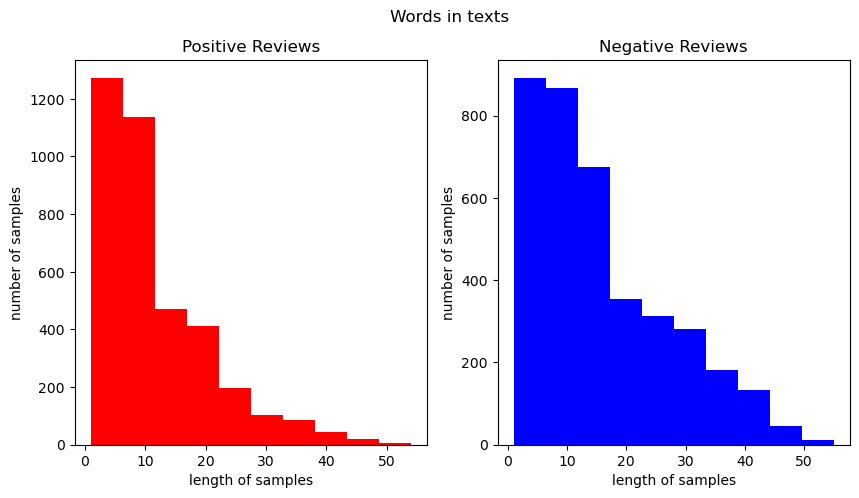

In [134]:
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(10,5))
text_len = train_data[train_data['label']==1]['tokenized'].map(lambda x: len(x))
ax1.hist(text_len, color='red')
ax1.set_title('Positive Reviews')
ax1.set_xlabel('length of samples')
ax1.set_ylabel('number of samples')
print('긍정 리뷰의 평균 길이 :', np.mean(text_len))

text_len = train_data[train_data['label']==0]['tokenized'].map(lambda x: len(x))
ax2.hist(text_len, color='blue')
ax2.set_title('Negative Reviews')
fig.suptitle('Words in texts')
ax2.set_xlabel('length of samples')
ax2.set_ylabel('number of samples')
print('부정 리뷰의 평균 길이 :', np.mean(text_len))
plt.show()

In [135]:
# test 데이터

In [136]:
test_data['tokenized'] = test_data['reviews'].apply(okt.morphs)
test_data['tokenized'] = test_data['tokenized'].apply(lambda x: [item for item in x if item not in stopwords])

In [137]:
X_train = train_data['tokenized'].values
y_train = train_data['label'].values
X_test= test_data['tokenized'].values
y_test = test_data['label'].values

In [138]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)

In [139]:
tokenizer.word_index

{'.': 1,
 '잘': 2,
 '배송': 3,
 '너무': 4,
 '..': 5,
 '요': 6,
 '안': 7,
 '좋아요': 8,
 '재구매': 9,
 '구매': 10,
 '~': 11,
 '...': 12,
 '으로': 13,
 '사용': 14,
 '그냥': 15,
 '로': 16,
 '제품': 17,
 '했는데': 18,
 '보다': 19,
 '가격': 20,
 '하고': 21,
 '생각': 22,
 '좀': 23,
 '같아요': 24,
 '주문': 25,
 '입니다': 26,
 ',': 27,
 '맛': 28,
 '!': 29,
 '못': 30,
 '때': 31,
 '많이': 32,
 '만': 33,
 '해서': 34,
 '더': 35,
 '별로': 36,
 '것': 37,
 '개': 38,
 '합니다': 39,
 '사이즈': 40,
 'ㅠㅠ': 41,
 '에서': 42,
 '서': 43,
 '거': 44,
 '상품': 45,
 '포장': 46,
 '다른': 47,
 '좋네요': 48,
 '냄새': 49,
 '?': 50,
 'ㅠ': 51,
 '정말': 52,
 '하나': 53,
 '^^': 54,
 '했어요': 55,
 '부분': 56,
 '진짜': 57,
 '빠르고': 58,
 '조금': 59,
 '할': 60,
 '~~': 61,
 '제': 62,
 '나': 63,
 '넘': 64,
 '샀는데': 65,
 '저': 66,
 '인데': 67,
 '이라': 68,
 '구입': 69,
 '좋습니다': 70,
 '좋은': 71,
 '반품': 72,
 '또': 73,
 '사진': 74,
 '두': 75,
 '정도': 76,
 '해': 77,
 '만족합니다': 78,
 'ㅎㅎ': 79,
 '완전': 80,
 '느낌': 81,
 '아주': 82,
 '좋고': 83,
 '아직': 84,
 '딱': 85,
 '써': 86,
 '아이': 87,
 '맘': 88,
 '2': 89,
 '다시': 90,
 '엄청': 91,
 '....': 92,
 '감사합니다': 

In [140]:
threshold = 2
total_cnt = len(tokenizer.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    total_freq = total_freq + value

    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 17396
등장 빈도가 1번 이하인 희귀 단어의 수: 10386
단어 집합에서 희귀 단어의 비율: 59.70338008737641
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 10.022387771644729


In [141]:
#0 패딩토큰, OOV 토큰(사전에 없는 단어가 나오면 어떻게 표현할 것이냐)
# oov : out of vocabulary : 사전에 없는 단어
vocab_size = total_cnt - rare_cnt + 2 
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 7012


In [142]:
# 나는 오늘 학교에 갔습니다
#[0,0,0,........5,1,100,50]

In [143]:
tokenizer = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer.fit_on_texts(X_train)
# 토큰화 과정에서 사전에 없는 단어는 OOV로 표현
# oov_token : OOV

In [144]:
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [145]:
X_train

[[581, 24, 1870, 2, 223, 33, 961, 61, 136, 3501, 1091, 2],
 [58,
  37,
  191,
  37,
  2428,
  5,
  4664,
  105,
  873,
  17,
  4665,
  126,
  4666,
  86,
  3502,
  108,
  1,
  1092,
  1277,
  14,
  358,
  787,
  4667,
  217,
  5,
  33,
  202],
 [582, 88, 962, 217, 1176, 452, 441, 101, 338, 916, 1389, 52],
 [392,
  329,
  546,
  874,
  51,
  727,
  788,
  453,
  1,
  1,
  1278,
  1279,
  2110,
  4668,
  339,
  833,
  13,
  290,
  761,
  8,
  22,
  3503,
  535,
  51],
 [10, 4669, 1530, 1, 102, 14, 26, 35, 536, 2111],
 [185, 359, 11, 1, 2859],
 [3,
  2112,
  12,
  2113,
  47,
  3,
  2429,
  1871,
  12,
  157,
  112,
  1,
  1,
  4670,
  3,
  537,
  21,
  2860,
  4671,
  6,
  231,
  33,
  2111,
  12],
 [628, 406, 4672, 2, 52],
 [5, 2114, 1, 1280, 873, 490, 1, 2861, 1678, 917],
 [407, 1679, 60, 1, 1872, 4673, 1, 429, 9, 2],
 [3, 1281, 3504, 195, 323, 1],
 [629, 70, 2862, 1, 20, 514, 4674, 29, 1, 2, 91, 127, 1, 2430, 875, 25],
 [2431, 4675, 1, 50, 1531, 43, 1873, 116, 4676],
 [209,
  1390,
  

In [146]:
X_train
X_test

[[80,
  21,
  465,
  679,
  49,
  80,
  143,
  6980,
  1322,
  74,
  2979,
  5781,
  498,
  141,
  80,
  4497,
  113],
 [4, 208, 1],
 [5, 9, 173, 9, 173, 9],
 [1, 1, 50, 6471],
 [37, 138, 117, 5, 1200, 127, 148, 1592],
 [1, 271, 1, 328],
 [697, 100, 1102],
 [487, 22, 9],
 [85, 176, 3519, 1336, 489, 3, 1809, 25],
 [197, 336, 1, 690, 9],
 [81, 3672, 153, 844],
 [4191, 1, 78, 1077, 452, 608, 17, 487, 40],
 [1799, 1633, 9],
 [1431, 2751, 43, 144, 3, 165, 187, 1, 1001, 3, 704, 1, 235],
 [53, 256, 1371, 1755, 947, 2230, 83, 852],
 [392, 295, 535, 5, 1042, 7],
 [1,
  349,
  338,
  1068,
  2777,
  935,
  897,
  1,
  399,
  1602,
  127,
  309,
  1,
  1399,
  901,
  34,
  753,
  1,
  1082,
  244,
  2235,
  6380,
  124],
 [744, 611, 3623, 1, 126, 39, 770, 291, 771],
 [10, 616, 585, 1, 1986, 1, 813, 48, 122, 17, 155, 1942, 7],
 [1571, 306, 320, 1988, 3, 136, 1, 1829, 1, 608, 17],
 [47, 65, 350, 1363, 116, 253, 283, 2401, 266, 8, 4653, 472, 1010, 27],
 [562, 377, 515, 4, 1, 169, 1],
 [244, 37, 97, 

In [147]:
print(tokenizer.word_index)

{'OOV': 1, '.': 2, '잘': 3, '배송': 4, '너무': 5, '..': 6, '요': 7, '안': 8, '좋아요': 9, '재구매': 10, '구매': 11, '~': 12, '...': 13, '으로': 14, '사용': 15, '그냥': 16, '로': 17, '제품': 18, '했는데': 19, '보다': 20, '가격': 21, '하고': 22, '생각': 23, '좀': 24, '같아요': 25, '주문': 26, '입니다': 27, ',': 28, '맛': 29, '!': 30, '못': 31, '때': 32, '많이': 33, '만': 34, '해서': 35, '더': 36, '별로': 37, '것': 38, '개': 39, '합니다': 40, '사이즈': 41, 'ㅠㅠ': 42, '에서': 43, '서': 44, '거': 45, '상품': 46, '포장': 47, '다른': 48, '좋네요': 49, '냄새': 50, '?': 51, 'ㅠ': 52, '정말': 53, '하나': 54, '^^': 55, '했어요': 56, '부분': 57, '진짜': 58, '빠르고': 59, '조금': 60, '할': 61, '~~': 62, '제': 63, '나': 64, '넘': 65, '샀는데': 66, '저': 67, '인데': 68, '이라': 69, '구입': 70, '좋습니다': 71, '좋은': 72, '반품': 73, '또': 74, '사진': 75, '두': 76, '정도': 77, '해': 78, '만족합니다': 79, 'ㅎㅎ': 80, '완전': 81, '느낌': 82, '아주': 83, '좋고': 84, '아직': 85, '딱': 86, '써': 87, '아이': 88, '맘': 89, '2': 90, '다시': 91, '엄청': 92, '....': 93, '감사합니다': 94, '중': 95, '면': 96, '에요': 97, '1': 98, '비': 99, '색상': 100, '라': 101, '용': 102, 

리뷰의 최대 길이 : 55
리뷰의 평균 길이 : 13.817066666666667


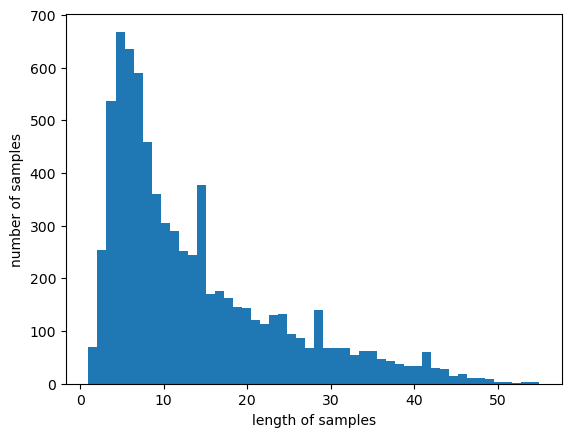

In [148]:
print('리뷰의 최대 길이 :',max(len(l) for l in X_train))
print('리뷰의 평균 길이 :',sum(map(len, X_train))/len(X_train))
plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [149]:
X_train = pad_sequences(X_train, maxlen = 51)
X_test = pad_sequences(X_test, maxlen = 51)

In [150]:
X_train[2]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,  582,   88,  962,  217, 1176,
        452,  441,  101,  338,  916, 1389,   52])

In [151]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [152]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [153]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [154]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15, callbacks=[es, mc], batch_size=60, validation_split=0.2)

Epoch 1/15
100/100 [==============================] - ETA: 0s - loss: 0.5645 - acc: 0.7195
Epoch 1: val_acc improved from -inf to 0.81400, saving model to best_model.h5
100/100 [==============================] - 6s 48ms/step - loss: 0.5645 - acc: 0.7195 - val_loss: 0.4262 - val_acc: 0.8140
Epoch 2/15
  3/100 [..............................] - ETA: 4s - loss: 0.3513 - acc: 0.8778

C:\Users\user\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


 99/100 [============================>.] - ETA: 0s - loss: 0.3358 - acc: 0.8712
Epoch 2: val_acc improved from 0.81400 to 0.85400, saving model to best_model.h5
100/100 [==============================] - 4s 41ms/step - loss: 0.3372 - acc: 0.8705 - val_loss: 0.3603 - val_acc: 0.8540
Epoch 3/15
 99/100 [============================>.] - ETA: 0s - loss: 0.2386 - acc: 0.9168
Epoch 3: val_acc improved from 0.85400 to 0.86067, saving model to best_model.h5
100/100 [==============================] - 4s 39ms/step - loss: 0.2402 - acc: 0.9162 - val_loss: 0.3598 - val_acc: 0.8607
Epoch 4/15
100/100 [==============================] - ETA: 0s - loss: 0.2004 - acc: 0.9327
Epoch 4: val_acc did not improve from 0.86067
100/100 [==============================] - 4s 41ms/step - loss: 0.2004 - acc: 0.9327 - val_loss: 0.3595 - val_acc: 0.8587
Epoch 5/15
 99/100 [============================>.] - ETA: 0s - loss: 0.1604 - acc: 0.9480
Epoch 5: val_acc did not improve from 0.86067
100/100 [==================

In [155]:
loaded_model = load_model('best_model.h5')

In [156]:
loaded_model.evaluate(X_test, y_test)[1]

79/79 [==============================] - 2s 15ms/step - loss: 0.3745 - acc: 0.8444


0.8443999886512756

In [158]:
# def sentiment_predict(new_sentence):
    # 구현, 한글 공백을 제외한 나머지 제거, 토큰화, 불용어 제거, 정수 인코딩, 패딩, 예측
# 이 제품 너무 좋은데요. 정말 좋아요. 강추합니다. => 긍정/ 부정 출력
# 이것도 상품인가요? 정말 화가 납니다. 분노가 치밀어요. 깨짜증납니다 => 긍정/ 부정